In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN


stojamieji = pd.read_csv('Stojamieji_2025_baigiamasis.csv')

# „Stojančiųjų 2025m. į aukštąsias mokyklas pasirinkimų analizė ir priėmimo rezultatų prognozė“

# Įvadas

Aukštasis mokslas yra vienas svarbiausių žinių ir kompetencijų šaltinių, formuojančių jaunų žmonių karjeros kelius. Kasmet tūkstančiai abiturientų Lietuvoje teikia prašymus stoti į įvairias aukštąsias mokyklas per LAMA BPO sistemą. Šiame procese svarbūs keli aspektai – kokias studijų programas renkasi jaunuoliai, kokius prioritetus jie suteikia skirtingoms kryptims, kiek jų sulaukia kvietimų studijuoti bei kiek galiausiai pasirašo sutartis.

Šiame darbe analizuojami **2025 m. stojamųjų į pirmosios pakopos ir vientisąsias studijas duomenys**. Analizė remiasi trimis duomenų šaltiniais:
- **Stojančiųjų profiliai** (lytis, gimimo metai, gyvenamoji vieta);
- **Prašymai** (programų pasirinkimai, prioritetai, finansavimo tipas, kvietimų ir sutarčių statusas);
- **Studijų programos** (aukštoji mokykla, programa, apskritis, savivaldybė).

**Darbo tikslas** – išnagrinėti stojančiųjų pasirinkimų tendencijas, įvertinti, kurie veiksniai daro didžiausią įtaką priėmimo rezultatams, bei sukurti prognozinį modelį, galintį padėti suprasti ir prognozuoti stojančiųjų elgesį.

Atliekant tyrimą bus siekiama atsakyti į šiuos klausimus:
- Kokios studijų kryptys ir programos yra populiariausios?
- Kaip skiriasi stojančiųjų pasirinkimai pagal lytį, gimimo metus ir gyvenamąją vietą?
- Kiek programų buvo pasirenkama aukščiausiu prioritetu ir kaip tai susiję su kvietimais studijuoti?
- Ar galima prognozuoti, kurie veiksniai labiausiai lemia, ar stojantysis bus pakviestas ir pasirašys sutartį?

Šis tyrimas ne tik parodys **esamas tendencijas**, bet ir leis praktiškai pritaikyti duomenų analitikos metodus – nuo **EDA (exploratory data analysis)** iki **modelių kūrimo, interpretacijos ir rezultatų vizualizavimo**.


In [12]:
rows, cols = stojamieji.shape
print(f"Eilučių skaičius: {rows}")
print(f"Stulpelių skaičius: {cols}")

print("\nStulpeliai:")
print(stojamieji.columns.tolist())

print("\nDuomenų tipai:")
print(stojamieji.dtypes)



Eilučių skaičius: 138482
Stulpelių skaičius: 16

Stulpeliai:
['prasymo_id', 'asmens_id', 'prioritetas', 'programos_id', 'finansavimas', 'ar_pakviete', 'ar_pasirase', 'gimimo_metai', 'amzius', 'lytis', 'gyvenamoji_vieta', 'prasymo_metai', 'programos_pavadinimas', 'mokymo_istaiga', 'apskritis', 'savivaldybe']

Duomenų tipai:
prasymo_id               object
asmens_id                object
prioritetas               int64
programos_id             object
finansavimas             object
ar_pakviete                bool
ar_pasirase                bool
gimimo_metai              int64
amzius                    int64
lytis                    object
gyvenamoji_vieta         object
prasymo_metai             int64
programos_pavadinimas    object
mokymo_istaiga           object
apskritis                object
savivaldybe              object
dtype: object


In [13]:
print("\nTrūkstamos reikšmės kiekviename stulpelyje:")
print(stojamieji.isnull().sum())



Trūkstamos reikšmės kiekviename stulpelyje:
prasymo_id               0
asmens_id                0
prioritetas              0
programos_id             0
finansavimas             0
ar_pakviete              0
ar_pasirase              0
gimimo_metai             0
amzius                   0
lytis                    0
gyvenamoji_vieta         0
prasymo_metai            0
programos_pavadinimas    0
mokymo_istaiga           0
apskritis                0
savivaldybe              0
dtype: int64


In [14]:
print(tabulate(stojamieji.head(50), headers='keys', tablefmt='psql'))

+----+-----------------+-----------------+---------------+-----------------+----------------+---------------+---------------+----------------+----------+---------+---------------------+-----------------+-----------------------------------------------------+-------------------------------------------+---------------------+------------------------------+
|    | prasymo_id      | asmens_id       |   prioritetas | programos_id    | finansavimas   | ar_pakviete   | ar_pasirase   |   gimimo_metai |   amzius | lytis   | gyvenamoji_vieta    |   prasymo_metai | programos_pavadinimas                               | mokymo_istaiga                            | apskritis           | savivaldybe                  |
|----+-----------------+-----------------+---------------+-----------------+----------------+---------------+---------------+----------------+----------+---------+---------------------+-----------------+-----------------------------------------------------+---------------------------------

In [15]:
stojamieji.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138482 entries, 0 to 138481
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   prasymo_id             138482 non-null  object
 1   asmens_id              138482 non-null  object
 2   prioritetas            138482 non-null  int64 
 3   programos_id           138482 non-null  object
 4   finansavimas           138482 non-null  object
 5   ar_pakviete            138482 non-null  bool  
 6   ar_pasirase            138482 non-null  bool  
 7   gimimo_metai           138482 non-null  int64 
 8   amzius                 138482 non-null  int64 
 9   lytis                  138482 non-null  object
 10  gyvenamoji_vieta       138482 non-null  object
 11  prasymo_metai          138482 non-null  int64 
 12  programos_pavadinimas  138482 non-null  object
 13  mokymo_istaiga         138482 non-null  object
 14  apskritis              138482 non-null  object
 15  

# [💰Finansavimas] ----- [👩🏼‍🤝‍🧑🏻Lytis] ----- [☝Prioritetai]

In [16]:
print(stojamieji["finansavimas"].value_counts(dropna=False))
print('---------------------------------------------------------')
print(stojamieji["lytis"].value_counts(dropna=False))
print('---------------------------------------------------------')
print("\nPrioritetai:\n", stojamieji["prioritetas"].value_counts().sort_index())


finansavimas
VF     90145
VNF    44291
ST      4046
Name: count, dtype: int64
---------------------------------------------------------
lytis
Moteris    84149
Vyras      54333
Name: count, dtype: int64
---------------------------------------------------------

Prioritetai:
 prioritetas
1    32092
2    26605
3    21123
4    17521
5    13791
6    11041
7     7013
8     5467
9     3829
Name: count, dtype: int64


In [17]:
order = ["VF", "VNF", "ST"]
fin_counts = stojamieji["finansavimas"].value_counts().reindex(order)
fin_share  = (fin_counts / fin_counts.sum() * 100).round(2)
fin_table  = pd.DataFrame({"kiekis": fin_counts, "dalis_%": fin_share})
print("Finansavimo tipų pasiskirstymas %:")
print(fin_table, "\n")

Finansavimo tipų pasiskirstymas %:
              kiekis  dalis_%
finansavimas                 
VF             90145    65.10
VNF            44291    31.98
ST              4046     2.92 



# 🥇 Top 10 programų

In [18]:
top10_all = stojamieji["programos_pavadinimas"].value_counts().head(10)
top10_p1  = stojamieji.loc[stojamieji["prioritetas"]==1, "programos_pavadinimas"].value_counts().head(10)
print("\nTOP-10 programos (viso):\n", top10_all)
print("\nTOP-10 programos (1 prioritetu):\n", top10_p1)


TOP-10 programos (viso):
 programos_pavadinimas
Psichologija                   4150
Kineziterapija                 3875
Teisė                          3369
Bendrosios praktikos slauga    3193
Medicina                       3091
Tarptautinis verslas           3013
Socialinis darbas              2668
Programų sistemos              2151
Statybos inžinerija            1829
Finansai                       1744
Name: count, dtype: int64

TOP-10 programos (1 prioritetu):
 programos_pavadinimas
Medicina                                    1141
Bendrosios praktikos slauga                 1136
Psichologija                                 989
Kineziterapija                               904
Socialinis darbas                            832
Teisė                                        804
Tarptautinis verslas                         631
Ikimokyklinis ir priešmokyklinis ugdymas     563
Programų sistemos                            562
Statybos inžinerija                          466
Name: count, dtype

# 📈Vizualizacijos

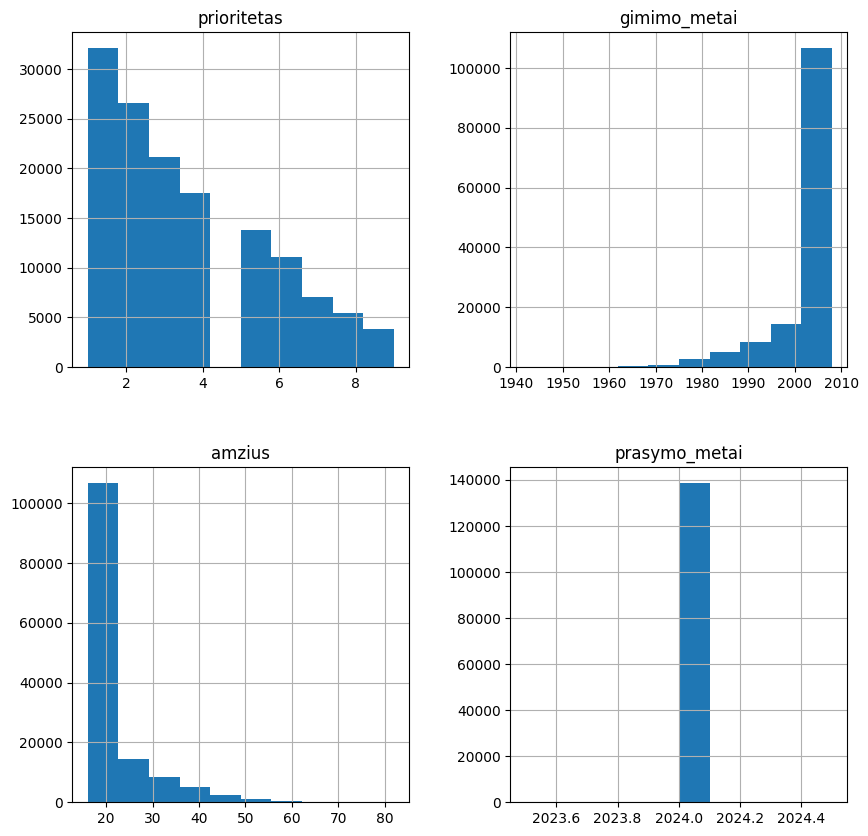

In [19]:
stojamieji.hist(figsize=(10,10))
plt.show()

## 1) Finansavimo tipų pasiskirstymas

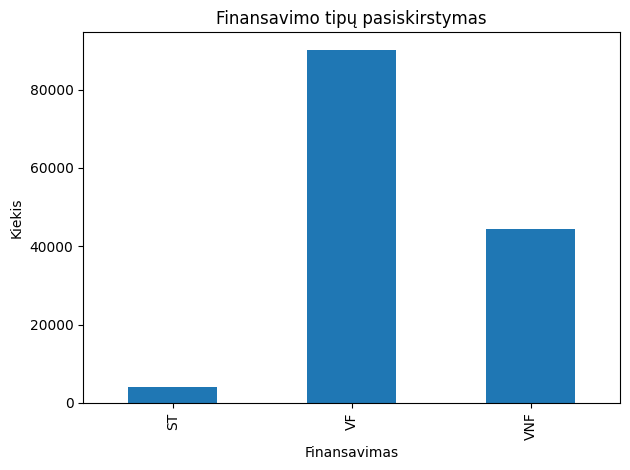

In [20]:
plt.figure()
stojamieji["finansavimas"].value_counts().sort_index().plot(kind="bar")
plt.title("Finansavimo tipų pasiskirstymas"); plt.xlabel("Finansavimas"); plt.ylabel("Kiekis")
plt.tight_layout(); plt.show()

Diagrama rodo, kiek stojimo prašymų pateikta pagal finansavimo tipą: VF, VNF ir ST. 

Matome, kad daugiausia prašymų – VF, mažiau – VNF, mažiausiai – ST.

# 2) Prioritetų paskirstymas

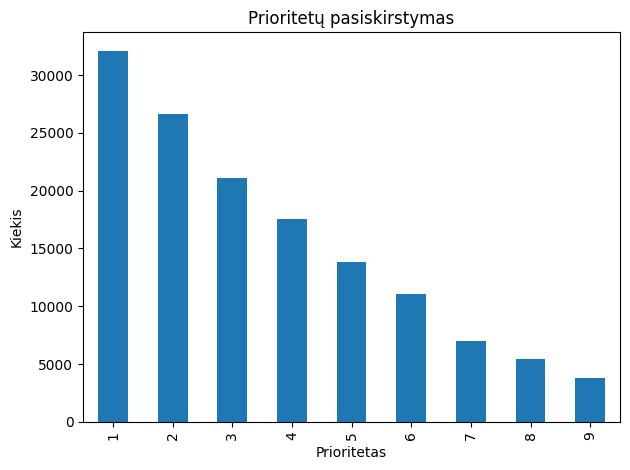

In [21]:
plt.figure()
stojamieji["prioritetas"].value_counts().sort_index().plot(kind="bar")
plt.title("Prioritetų pasiskirstymas")
plt.xlabel("Prioritetas")
plt.ylabel("Kiekis")
plt.tight_layout()
plt.show()

Diagrama rodo, kiek prašymų pateikta kiekvienu prioriteto numeriu.

Matyti, kad daugiausia prašymų yra 1–3 prioritetuose, o toliau skaičiai nuosekliai mažėja.

# 3) Amžiaus paskirstymas

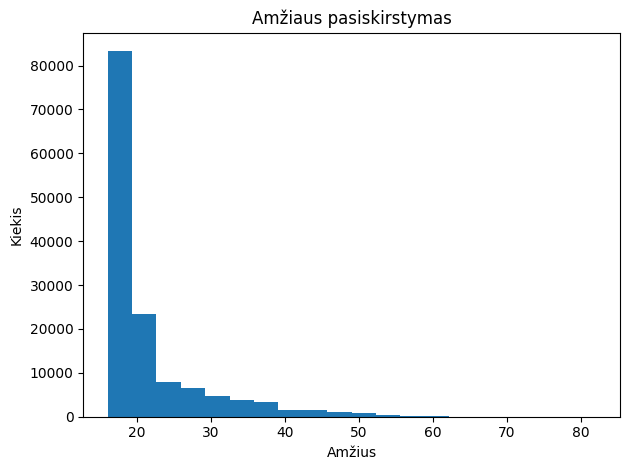

In [22]:
plt.figure()
stojamieji["amzius"].dropna().astype(int).plot(kind="hist", bins=20)
plt.title("Amžiaus pasiskirstymas")
plt.xlabel("Amžius")
plt.ylabel("Kiekis")
plt.tight_layout()
plt.show()

Diagrama rodo stojančiųjų amžiaus pasiskirstymą. 

Kiekvienas stulpelis – amžiaus intervalas, stulpelio aukštis – kiek stojančiųjų tame intervale. 

Taip matosi, kuri amžiaus grupė dominuoja, ar yra vyresnių kandidatų ir ar pasiskirstymas tolygus ar pasviręs.

# 4) Kvietimų pasiskirstymas pagal lytį

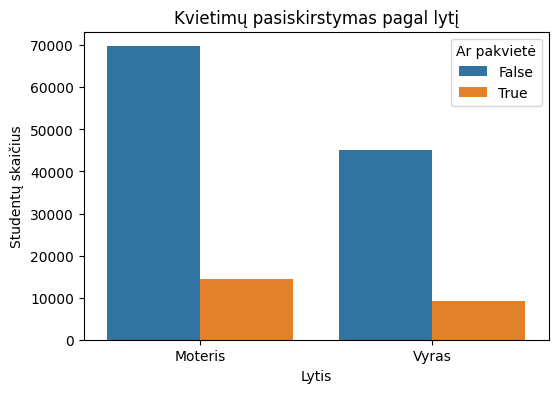

In [23]:
lytis_kvietimas = stojamieji.groupby(["lytis", "ar_pakviete"]).size().reset_index(name="kiekis")


plt.figure(figsize=(6,4))
sns.barplot(data=lytis_kvietimas, x="lytis", y="kiekis", hue="ar_pakviete")
plt.title("Kvietimų pasiskirstymas pagal lytį")
plt.xlabel("Lytis")
plt.ylabel("Studentų skaičius")
plt.legend(title="Ar pakvietė")
plt.show()

Diagrama parodo, kaip kvietimai studijuoti pasiskirstė tarp vyrų ir moterų. 

Galima palyginti, ar viena lytis turi didesnę kvietimų dalį.

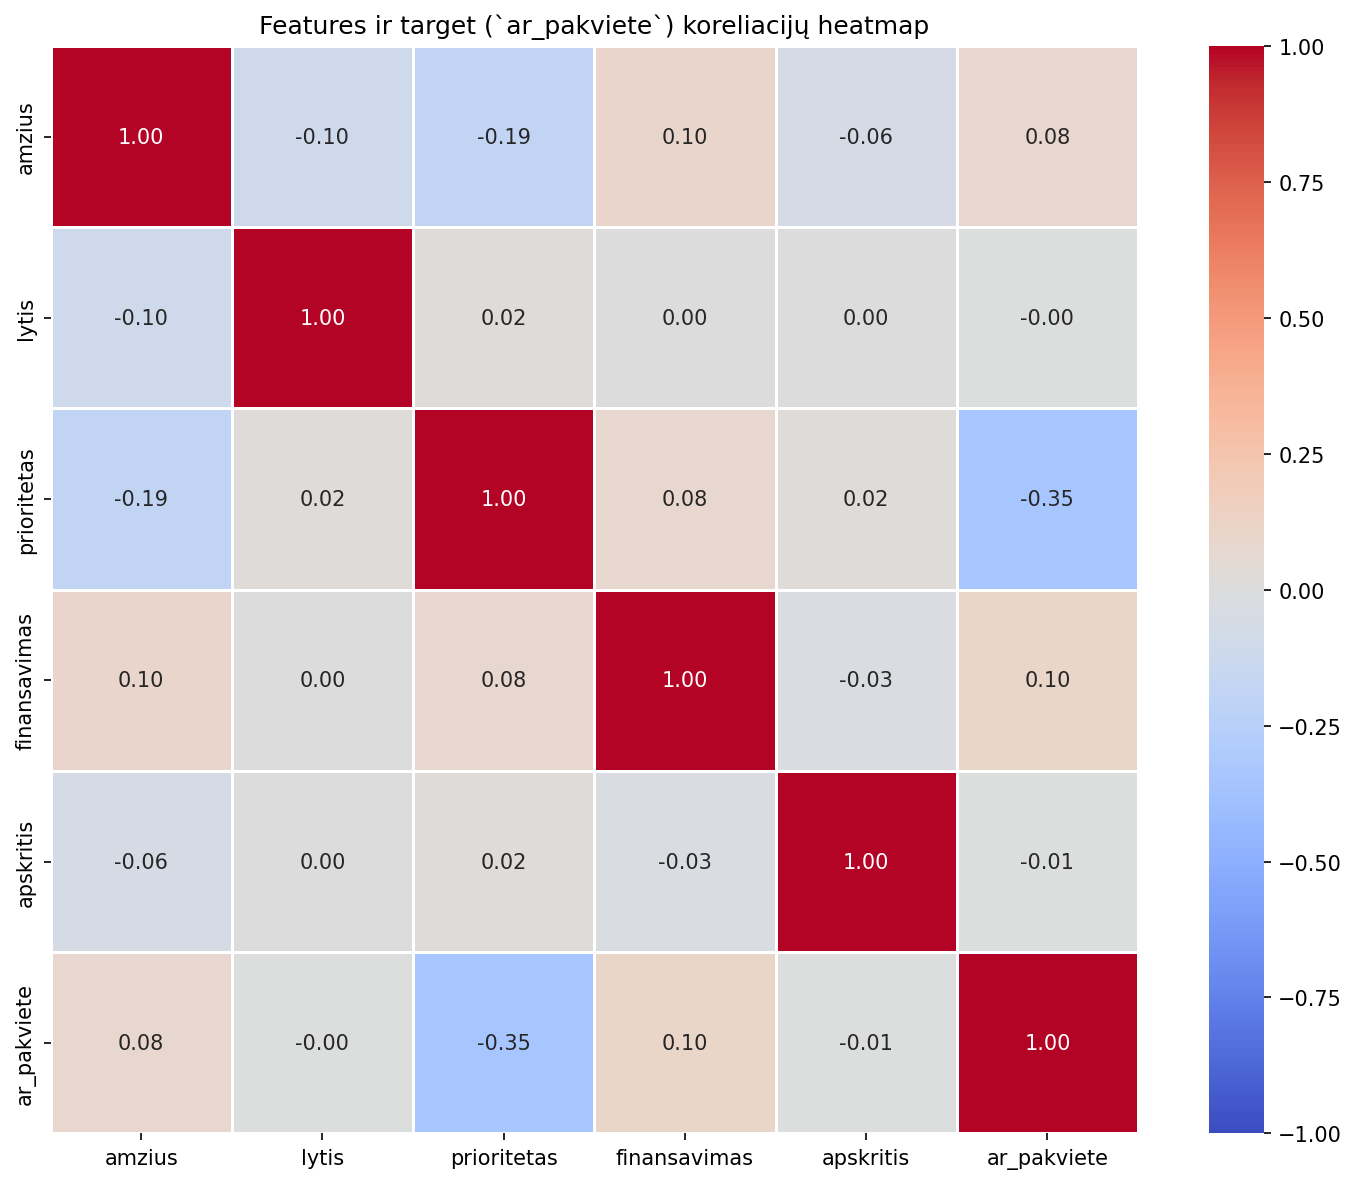

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


features = ["amzius", "lytis", "prioritetas", "finansavimas", "apskritis"]
target = "ar_pakviete"


df_feat = stojamieji[features + [target]].copy()

for col in df_feat.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_feat[col] = le.fit_transform(df_feat[col].astype(str))


corr = df_feat.corr(method="pearson")


plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    square=True, linewidths=0.5, linecolor="white"
)
plt.title("Features ir target (`ar_pakviete`) koreliacijų heatmap")
plt.tight_layout()
plt.show()


# Koreliacijų analizė

Sudarę požymių ir tikslinio kintamojo ar_pakviete koreliacijų heatmap, 
matome, kad ryšiai nėra stiprūs. 
Išsiskiria tik prioritetas, kuris turi vidutinio stiprumo neigiamą koreliaciją (-0.35) su rezultatu: 
kuo žemesnis studijų pasirinkimo prioritetas, tuo mažesnė tikimybė būti pakviestam. 
Taip pat nedidelį ryšį turi finansavimas (apie 0.1). 
Tuo tarpu amzius, lytis ir apskritis su rezultatu beveik nesusiję.

Tai patvirtina, kad vien tik koreliacijos nepakanka prognozavimo modeliams – 
todėl papildomai buvo atlikta požymių svarbos analizė naudojant Random Forest.


# Modelio kūrimas

In [25]:
features = ["amzius", "lytis", "prioritetas", "finansavimas", "apskritis"]
target = "ar_pakviete"

X = stojamieji[features]
y = stojamieji[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Mokymosi duomenų dydis:", X_train.shape)
print("Testavimo duomenų dydis:", X_test.shape)

Mokymosi duomenų dydis: (110785, 13)
Testavimo duomenų dydis: (27697, 13)


Šiame etape iš duomenų atrinkti svarbiausi kintamieji: amžius, lytis, pasirinkimo prioritetas, finansavimo tipas, apskritis.

Kadangi dalis kintamųjų yra kategoriniai, jie buvo paversti į skaitinius naudojant One-Hot Encoding.

Galiausiai, duomenys padalyti į mokymosi (80 %) ir testavimo (20 %) rinkinius, kad būtų galima patikrinti modelio bendrinamąją galią.

# Logistinė regresija

Logistinė regresija yra vienas iš klasikinių statistinių modelių, naudojamų dvejetainės klasifikacijos uždaviniams. Modelis remiasi logit funkcija, kuri leidžia prognozuoti įvykio tikimybę (pvz., ar stojantysis gaus kvietimą studijuoti). Pagrindinė šio metodo stiprybė – aiškinamumas: pagal koeficientus galima nustatyti, kokią įtaką kiekvienas požymis daro prognozei. Logistinė regresija yra greita, lengvai įgyvendinama ir dažnai naudojama kaip bazinis modelis, tačiau jos apribojimai atsiskleidžia, kai duomenys yra sudėtingi arba netiesiškai atskiriami.

# Logistic Regression modelis

In [26]:
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_reg.fit(X_train, y_train)



y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]


print("Tikslumas (Accuracy):", accuracy_score(y_test, y_pred))
print("Precizija (Precision):", precision_score(y_test, y_pred))
print("Jautrumas (Recall):", recall_score(y_test, y_pred))
print("F1 skaičius:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nKlasifikacijos ataskaita:")
print(classification_report(y_test, y_pred))

print("\nKlaidų matrica:")
print(confusion_matrix(y_test, y_pred))

Tikslumas (Accuracy): 0.6698559410766509
Precizija (Precision): 0.32201621317922785
Jautrumas (Recall): 0.851985559566787
F1 skaičius: 0.467381174277726
ROC AUC: 0.8177473826169769

Klasifikacijos ataskaita:
              precision    recall  f1-score   support

       False       0.95      0.63      0.76     22988
        True       0.32      0.85      0.47      4709

    accuracy                           0.67     27697
   macro avg       0.64      0.74      0.61     27697
weighted avg       0.85      0.67      0.71     27697


Klaidų matrica:
[[14541  8447]
 [  697  4012]]


# Random Forest

Random Forest yra ansamblinis metodas, jungiantis daugybę sprendimų medžių. Kiekvienas medis yra apmokomas iš skirtingų duomenų aibės ir požymių kombinacijų, todėl galutinis rezultatas gaunamas balsavimo principu. Šis metodas pasižymi dideliu tikslumu, atsparumu triukšmui ir galimybe apdoroti įvairaus tipo duomenis. Random Forest taip pat leidžia nustatyti požymių svarbą, todėl modelį galima interpretuoti praktiškai. Palyginus su logistine regresija, Random Forest dažniausiai pasiekia geresnę prognozių kokybę, tačiau yra mažiau intuityvus paaiškinimo požiūriu.

# Random Forest modelis

In [27]:
rf_model = RandomForestClassifier( n_estimators=200, max_depth=None, random_state=42, class_weight="balanced" )


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest rezultatai")
print("Tikslumas (Accuracy):", accuracy_score(y_test, y_pred_rf))
print("Precizija (Precision):", precision_score(y_test, y_pred_rf))
print("Jautrumas (Recall):", recall_score(y_test, y_pred_rf))
print("F1 skaičius:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

print("\nKlasifikacijos ataskaita:")
print(classification_report(y_test, y_pred_rf))

print("\nKlaidų matrica:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest rezultatai
Tikslumas (Accuracy): 0.7888579990612702
Precizija (Precision): 0.4290165773401471
Jautrumas (Recall): 0.7309407517519643
F1 skaičius: 0.5406848884699968
ROC AUC: 0.8225008205967322

Klasifikacijos ataskaita:
              precision    recall  f1-score   support

       False       0.94      0.80      0.86     22988
        True       0.43      0.73      0.54      4709

    accuracy                           0.79     27697
   macro avg       0.68      0.77      0.70     27697
weighted avg       0.85      0.79      0.81     27697


Klaidų matrica:
[[18407  4581]
 [ 1267  3442]]


Logistic Regression modelis parodė aukštą bendrą tikslumą, tačiau dėl labai mažo jautrumo praktiniam naudojimui jis netinka. 

Random Forest modelis užtikrino geresnę pusiausvyrą tarp precizijos ir jautrumo, todėl yra tinkamesnis sprendimas prognozuoti stojančiųjų priėmimo rezultatus.

# Klaidų matricos grafikai

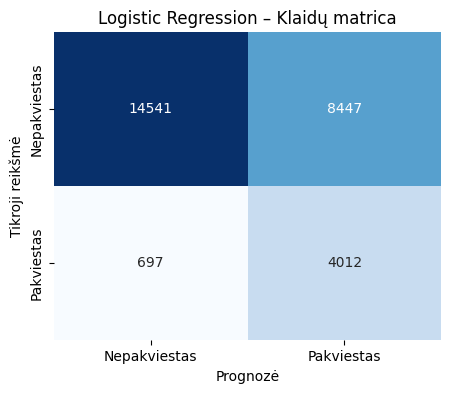

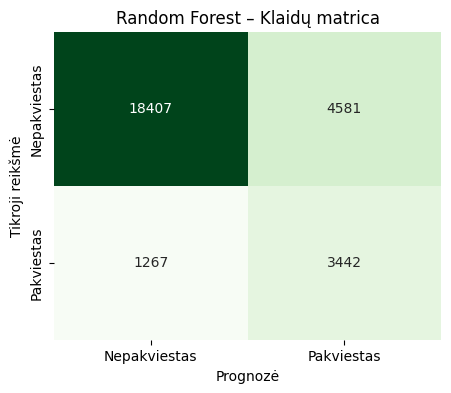

In [28]:
cm_log = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Nepakviestas", "Pakviestas"],
            yticklabels=["Nepakviestas", "Pakviestas"])
plt.title("Logistic Regression – Klaidų matrica")
plt.xlabel("Prognozė")
plt.ylabel("Tikroji reikšmė")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Nepakviestas", "Pakviestas"],
            yticklabels=["Nepakviestas", "Pakviestas"])
plt.title("Random Forest – Klaidų matrica")
plt.xlabel("Prognozė")
plt.ylabel("Tikroji reikšmė")
plt.show()


Logistic Regression klaidų matricoje matyti, kad modelis labai dažnai priskiria studentus „pakviestiems“, nors jie iš tikrųjų tokie nebuvo – tai patvirtina žemą preciziją. Tačiau jis gana gerai atpažįsta tikruosius pakviestuosius (aukštas recall).

Random Forest klaidų matricoje klasifikacija yra labiau subalansuota – klaidingų prognozių mažiau, daugiau atvejų klasifikuojama teisingai. Tai rodo geresnį precizijos ir recall balansą, kas patvirtina, kad Random Forest modelis yra patikimesnis praktiniam naudojimui.

# ROC

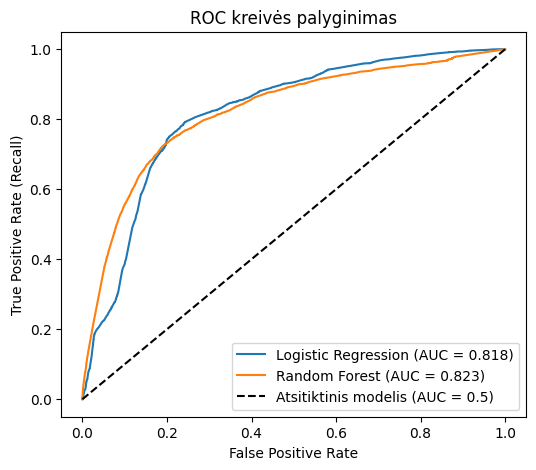

In [29]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba)
auc_log = roc_auc_score(y_test, y_proba)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)


plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")


plt.plot([0,1], [0,1], "k--", label="Atsitiktinis modelis (AUC = 0.5)")

plt.title("ROC kreivės palyginimas")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.show()


ROC kreivė rodo modelio gebėjimą atskirti dvi klases – pakviestuosius ir nepakviestuosius. Kuo arčiau kreivė priartėja prie viršutinio kairiojo kampo, tuo geresnis modelis.

# TOP 10 požymių pagal svarbą

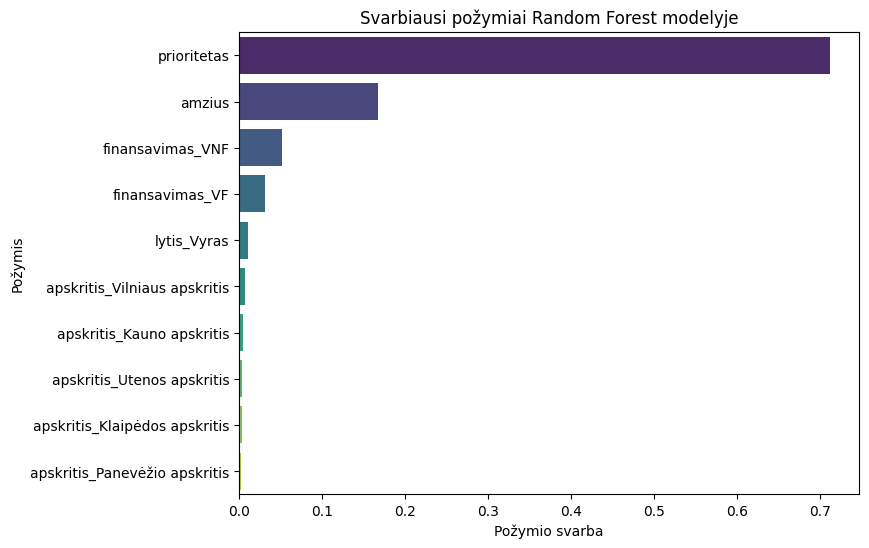

In [30]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({"Požymis": feature_names,"Svarba": importances}).sort_values("Svarba", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Svarba", y="Požymis",
            hue="Požymis", palette="viridis", legend=False)
plt.title("Svarbiausi požymiai Random Forest modelyje")
plt.xlabel("Požymio svarba")
plt.ylabel("Požymis")
plt.show()


Analizė parodė, kad svarbiausi kvietimo prognozės požymiai yra prioritetas, finansavimo tipas ir amžius. Taip pat reikšmingos buvo studijų programos bei mokymo įstaigos, o geografiniai rodikliai (apskritis, savivaldybė) turėjo mažesnę įtaką. Tai rodo, kad kvietimo tikimybę labiausiai lemia paties stojančiojo pasirinkimai ir finansavimo galimybės.

# Modelio interpretacija

Atlikus modelių palyginimą paaiškėjo, kad Logistic Regression pasiekė aukštą jautrumą (recall = 0.85), tačiau labai žemą preciziją (precision = 0.32). Tai reiškia, kad modelis dažniausiai atpažįsta pakviestuosius, bet kartu sugeneruoja daug klaidingų „pakvietimų“. Todėl šis modelis tinka kaip bazinis, bet praktiniam taikymui jo patikimumas ribotas.

Tuo tarpu Random Forest užtikrino geresnį balansą tarp tikslumo (accuracy = 0.79), precizijos (0.43) ir jautrumo (0.73). ROC AUC reikšmė (0.823) parodė, kad šis modelis patikimai skiria pakviestuosius nuo nepakviestųjų. Be to, Random Forest suteikia galimybę įvertinti požymių svarbą: didžiausią įtaką kvietimui gauti turi prioritetas, finansavimo tipas ir amžius, o studijų programa ir mokymo įstaiga taip pat yra reikšmingi veiksniai.



# Išvados: 

Duomenų analizė (EDA) parodė, kad daugiausia stojamųjų prašymų buvo teikiama į valstybės finansuojamas vietas (VF). Populiariausios studijų programos – Medicina, Psichologija, Kineziterapija, Teisė, kurios dažniausiai pasirenkamos pirmuoju prioritetu. Didžioji dalis stojančiųjų yra 18–20 metų amžiaus, o pagal lytį vyrauja moterys.

Logistinė regresija pasiekė 0.67 tikslumą ir labai aukštą jautrumą (0.85), bet žemą preciziją (0.32). Tai reiškia, kad modelis nepraleido daug pakviestųjų, tačiau sugeneravo daug klaidingų „pakvietimų“.

Random Forest pasiekė aukštesnį tikslumą (0.79), geresnę preciziją (0.43) ir pakankamai aukštą jautrumą (0.73). ROC AUC (0.823) buvo šiek tiek didesnis nei logistinės regresijos. Tai parodė, kad Random Forest užtikrina geresnį balansą tarp metrikų ir yra tinkamesnis praktiniam taikymui.

Požymių svarbos analizė atskleidė, kad didžiausią įtaką kvietimo prognozei turi prioritetas, finansavimo tipas ir amžius, o taip pat reikšmingi studijų programos ir mokymo įstaigos pasirinkimai. Geografiniai rodikliai (apskritis, savivaldybė) turėjo mažesnę reikšmę.

# Bendra išvada:

 Logistic Regression tinkamas kaip bazinis modelis ir tendencijų nustatymui, tačiau praktiniam prognozavimui labiau pasiteisino Random Forest dėl subalansuotų metrikų ir galimybės interpretuoti požymių svarbą.